<a href="https://colab.research.google.com/github/amaliahwang/MACHINE-LEARNING---MLiB-Clustering/blob/main/MLiB_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Kelompok
1. Yuza Nugrahadita Prasetyo 21.11.3855
2. Amalia Fyrdausa 21.11.3933
3. Bentar Cahyo Pamungkas 21.11.3828

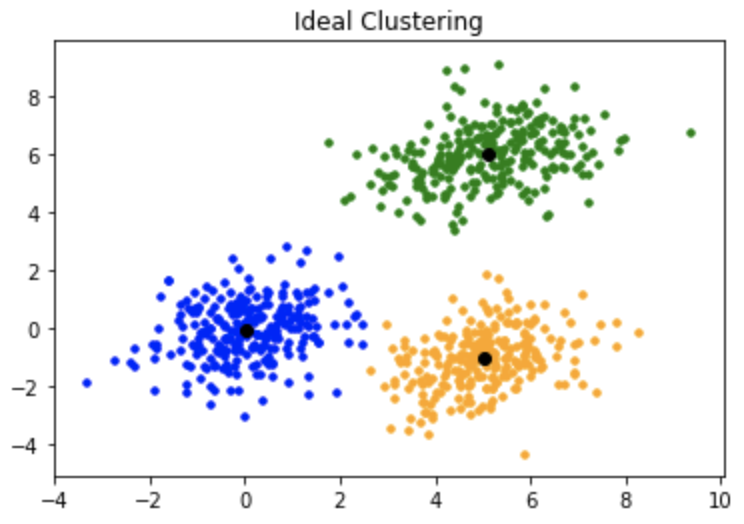

#Clustering

The Dataset contains the Stats of heroes until Mobile Legends Version Patch 1.7.20 September 20, 2022.

Note There are 117 heroes in Mobile legends as of September 20, 2022.
Heroes Sun, Tigreal and Saber have been excluded. Due to Unavailable data.

In [ ]:
pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('mlbb').getOrCreate()
df = spark.read.csv('/content/drive/MyDrive/Big Data Lanjut/Dataset/Mlbb_Heroes.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Voice_Line: string (nullable = true)
 |-- Release_Date: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
Name,Aamon,Akai,Aldous,Alice,Alpha
Title,Duke of Shards,Panda Warrior,Soul Contractor,Queen of Blood,Blade of Enmity
Voice_Line,"It is better to be feared than loved, if you c...",Now Akai enters the scene!,Primary Role,Watch your back!,Test! Alpha is online.
Release_Date,2021-10-25,2016,2018,2016,2017
Primary_Role,Assassin,Tank,Fighter,Mage,Fighter
Secondary_Role,None,Support,None,Tank,None
Lane,Jungler,Roamer,EXP Lane,EXP Lane,EXP Lane
Hp,2614,2769,2718,2573,2646
Hp_Regen,8.0,8.4,9.8,7.2,7.8
Mana,455,422,405,493,453


In [ ]:
df = df.drop('Voice_Line', 'Title','Release_Date')

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler

string_columns = ['Primary_Role', 'Secondary_Role', 'Lane']
stages = []

for string_col in string_columns:
    string_indexer = StringIndexer(inputCol=string_col, outputCol=string_col + '_index', handleInvalid='keep')  # handleInvalid='keep' mempertahankan nilai yang tidak ada dalam model
    stages.append(string_indexer)

pipeline = Pipeline(stages=stages)

pipeline_model = pipeline.fit(df)
df = pipeline_model.transform(df)

df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Primary_Role: string (nullable = true)
 |-- Secondary_Role: string (nullable = true)
 |-- Lane: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)
 |-- Primary_Role_index: double (nullable = false)
 |-- Secondary_Role_index: double (nullable = false)
 |-- Lane_index: double (nullable = false)



In [ ]:
df = df.drop('Primary_Role', 'Secondary_Role','Lane')

In [ ]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Hp: integer (nullable = true)
 |-- Hp_Regen: double (nullable = true)
 |-- Mana: integer (nullable = true)
 |-- Mana_Regen: integer (nullable = true)
 |-- Phy_Damage: integer (nullable = true)
 |-- Mag_Damage: integer (nullable = true)
 |-- Phy_Defence: integer (nullable = true)
 |-- Mag_Defence: integer (nullable = true)
 |-- Mov_Speed: integer (nullable = true)
 |-- Esport_Wins: integer (nullable = true)
 |-- Esport_Loss: integer (nullable = true)
 |-- Primary_Role_index: double (nullable = false)
 |-- Secondary_Role_index: double (nullable = false)
 |-- Lane_index: double (nullable = false)



In [ ]:
numeric_features = [t[0] for t in df.dtypes if t[1] in ['int','double']]

# yang diambil hanya kolom yang memiliki fitur numerik
numeric_summary = df.select(numeric_features).summary()
numeric_summary.show(truncate=False)

+-------+------------------+------------------+------------------+------------------+-----------------+----------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+
|summary|Hp                |Hp_Regen          |Mana              |Mana_Regen        |Phy_Damage       |Mag_Damage|Phy_Defence       |Mag_Defence       |Mov_Speed         |Esport_Wins      |Esport_Loss      |Primary_Role_index|Secondary_Role_index|Lane_index        |
+-------+------------------+------------------+------------------+------------------+-----------------+----------+------------------+------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+
|count  |114               |114               |114               |113               |114              |114       |114               |114               |114               |114              |114       

In [ ]:
df = df.drop('Mag_Damage')

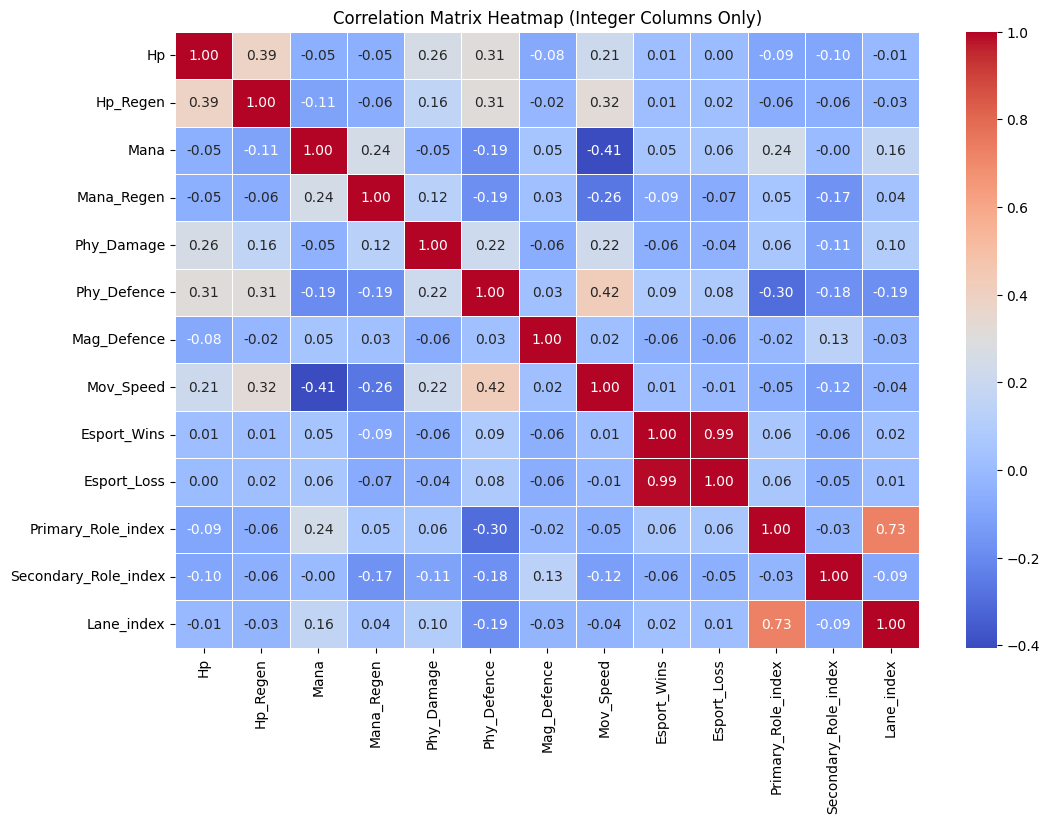

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt

integer_columns = [col_name for col_name, col_type in df.dtypes if col_type in ['int','double']]

vector_assembler = VectorAssembler(inputCols=integer_columns, outputCol="features")

for c in integer_columns:
    median_value = df.approxQuantile(c, [0.5], 0.0)[0]
    df = df.na.fill(median_value, [c])

vector_assembler = VectorAssembler(inputCols=integer_columns, outputCol="features")

df_assembled = vector_assembler.transform(df).select("features")

matrix = Correlation.corr(df_assembled, "features").head()
correlation_matrix = matrix[0].toArray()

correlation_df = pd.DataFrame(correlation_matrix, columns=integer_columns, index=integer_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap (Integer Columns Only)")
plt.show()

#Tugas

Temukan nilai K terbaik bagi dataset ini, gunakan metode penentuan nilai K yang telah tersedia, paparkan hasilnya, dan jabarkan alasan akhirnya kelompok kalian memilih nilai tersebut.

#Melakukan clustering dengan tujuan mengelompokkan hero

In [ ]:
# Pilih atribut yang akan digunakan untuk clustering
selected_features =["Esport_Wins", "Esport_Loss", "Mana", "Mana_Regen", "Hp", "Hp_Regen"]

# Gabungkan atribut menjadi satu vektor
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
df = assembler.transform(df)

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# List nilai K yang akan diuji
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    # Pilih jumlah klaster
    kmeans = KMeans().setK(k).setSeed(1).setMaxIter(20)

    # Latih model KMeans
    model = kmeans.fit(df)

    # Prediksi klaster untuk data
    predictions = model.transform(df)

    # Evaluasi kualitas klaster menggunakan Silhouette Score
    evaluator = ClusteringEvaluator()
    silhouette_score = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette_score)

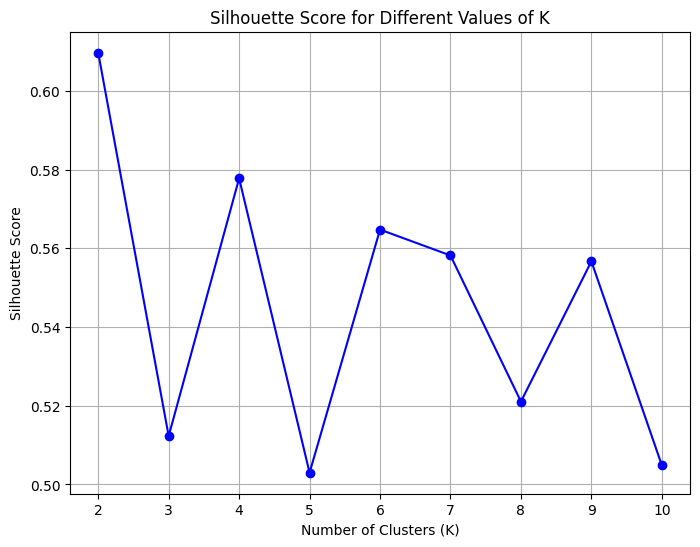

In [ ]:
# Plot hasil dari metode Silhouette Score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.grid(True)
plt.show()

In [ ]:
# Temukan nilai K dengan skor silhouette tertinggi
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print(f"Best K based on Silhouette Score: {best_k}")

Best K based on Silhouette Score: 2


Metode Silhouette Score digunakan untuk mengevaluasi kualitas klaster yang dihasilkan oleh algoritma klastering. Skor silhouette mengukur seberapa baik sebuah objek cocok ke dalam klaster yang diberikan berdasarkan jarak rata-rata antara objek dengan objek dalam klaster yang sama dan dengan objek dalam klaster lain.

Untuk menemukan nilai K terbaik menggunakan metode Silhouette Score dalam PySpark, perlu melatih model KMeans dengan berbagai nilai K, menghitung skor silhouette untuk setiap nilai K, dan memilih nilai K yang memberikan skor silhouette tertinggi.

Kami mendapatkan nilai K yang memberikan skor silhouette tertinggi sebagai nilai terbaik untuk klastering dataset Hero MLBB dengan skor/nilai 2. Karena pemilihan nilai K tersebut adalah karena nilai tersebut memberikan klaster yang memiliki objek-objek yang lebih seragam di dalamnya dan jarak yang lebih besar antara klaster satu sama lain, sehingga memberikan skor silhouette tertinggi secara keseluruhan.
